In [54]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [55]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

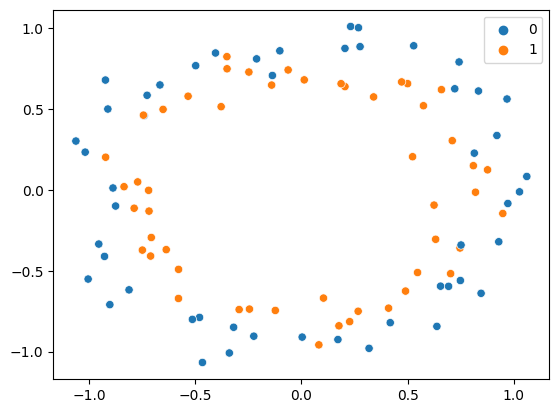

In [56]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Without Early Stopping

In [58]:
model = Sequential()
model.add(Dense(256,input_dim=2, activation= 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [60]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

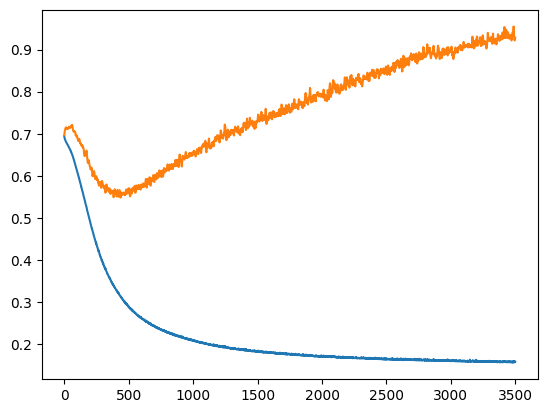

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

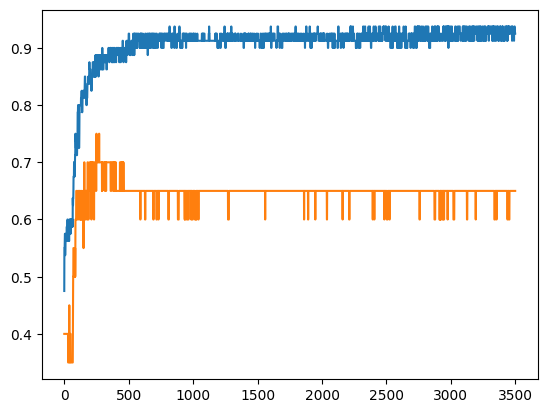

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# With Early Stopping

In [76]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [79]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 144ms/step - loss: 0.6918 - accuracy: 0.4875 - val_loss: 0.6933 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 34ms/step - loss: 0.6898 - accuracy: 0.5000 - val_loss: 0.6959 - val_accuracy: 0.6000
Epoch 3/3500
3/3 [==============================] - 0s 35ms/step - loss: 0.6885 - accuracy: 0.4875 - val_loss: 0.6990 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.6873 - accuracy: 0.5250 - val_loss: 0.7015 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 31ms/step - loss: 0.6866 - accuracy: 0.5500 - val_loss: 0.7038 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 26ms/step - loss: 0.6857 - accuracy: 0.5625 - val_loss: 0.7058 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 33ms/step - loss: 0.6847 - accuracy: 0.5625 - val_loss: 0.7070 - val_accuracy: 0.4000
Epoch 8/3500

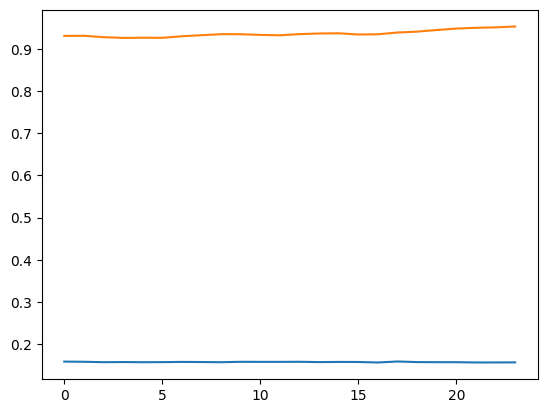

In [80]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])